In [34]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

import os, os.path
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error
import pickle
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

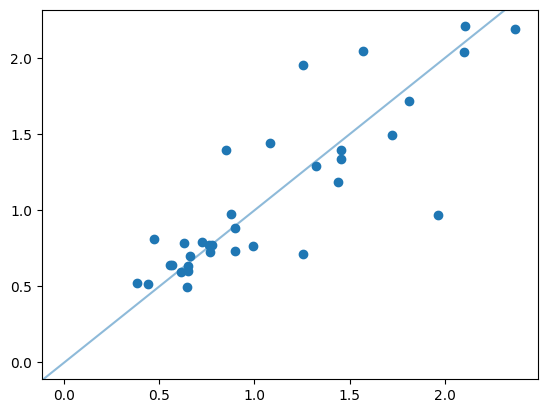

In [9]:
plt.scatter(y_test_fe, y_pred_fe)
plt.axline((0, 0), slope=1, alpha=0.5)

In [35]:
X = pd.read_csv('data/LH_KPCA_5_highRes.csv')
X = X.drop(columns=['Unnamed: 0'])
target = X['Drag Coefficient']
target = target.drop(columns=['Unnamed: 0'])
X = X.drop(['diameter', 'fall_velocity', 'air_density', 'air_viscosity', 'mass', 'Drag Coefficient'], axis=1)

X = X.values#
target = target.values
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25, random_state=42)

Text(0, 0.5, 'Drag Coefficient')

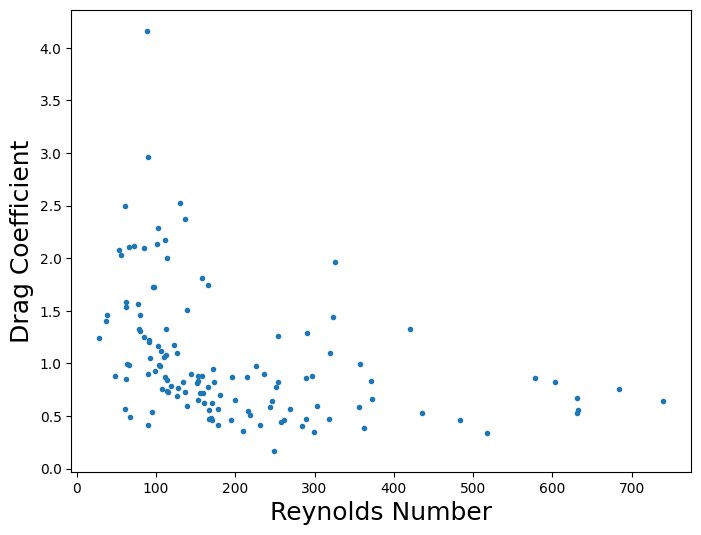

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(X['Reynolds Number'], X['Drag Coefficient'], marker='.')
plt.xlabel('Reynolds Number', fontsize=18)
plt.ylabel('Drag Coefficient', fontsize=18)
#plt.title('Reynolds Number vs Drag Coefficient on Locatelli and Hobbs Dataset')

In [18]:
target['Drag Coefficient']

0      1.509814
1      0.772313
2      0.460777
3      0.354451
4      0.644595
         ...   
131    0.784335
132    0.612352
133    0.515106
134    1.327452
135    1.143559
Name: Drag Coefficient, Length: 136, dtype: float64

In [1]:
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.scatter(X['Reynolds Number'], X['Drag Coefficient'], marker='.')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xticks([1,10,100,1000,10000,100000])
ax1.set_yticks([0.01,1,10,100,1000,2500,5000])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Log Reynolds Number', fontsize=18)
plt.ylabel('Log Drag Coefficient', fontsize=18)
#plt.title('Log Reynolds Number vs Log Drag Coefficient on Locatelli and Hobbs Dataset')

NameError: name 'plt' is not defined

In [15]:
X.columns

Index(['Reynolds Number', 'shapes', 'KPCA1', 'KPCA2', 'KPCA3', 'KPCA4',
       'KPCA5'],
      dtype='object')

In [38]:
# IMPLEMENTING RANDOM SEARCH

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['log2', 'sqrt', None]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
#model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestRegressor()

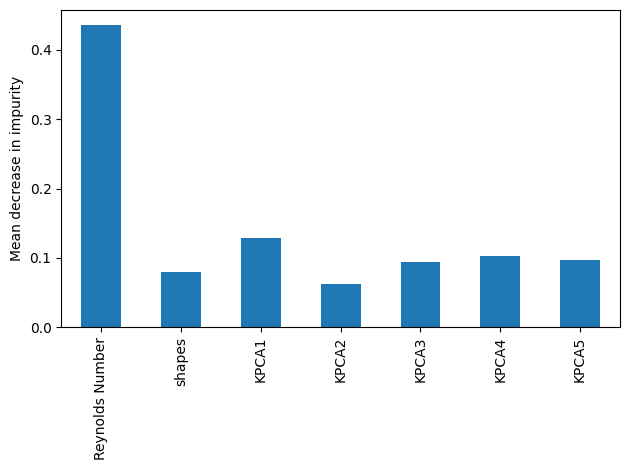

In [43]:
importances = rf.feature_importances_
#std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
feature_names = ['Reynolds Number', 'shapes', 'KPCA1', 'KPCA2', 'KPCA3', 'KPCA4','KPCA5']
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [18]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred) # 0.1714064174969987

0.2666983126044213

In [120]:
xgb_model = XGBRegressor()

param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9, 15, 20],
    'n_estimators': [50, 100, 250, 500, 750, 1000],
    'min_child_weight': [1, 10, 100]
}

model = GridSearchCV(xgb_model, param_grid, cv=KFold(n_splits=5, shuffle=True), scoring='neg_mean_squared_error', verbose=2)
model.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_chil

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    in...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 6, 9, 15, 20],
                         'min_child_weight': [1, 10, 100],
                         'n_estimators': [50, 100, 250, 500, 750, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

In [12]:
y_pred_test = model.predict(X_test)
print(mean_squared_error(y_test, y_pred_test))

0.2666983126044213


AttributeError: 'RandomizedSearchCV' object has no attribute 'feature_importances_'

In [114]:
print(model.best_estimator_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


Text(0, 0.5, 'y_prediction from model')

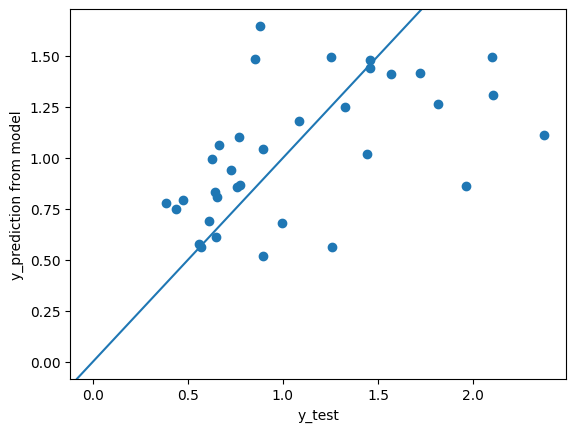

In [91]:
plt.scatter(y_test, y_pred_test)
plt.axline((0, 0), slope=1)
plt.xlabel('y_test')
plt.ylabel('y_prediction from model') # test9

In [6]:
len(X[X['Reynolds Number'] <= 158])

67

In [10]:
low_X = (X[X['Reynolds Number'] <= 158])
low_target = low_X['Drag Coefficient']
high_X = (X[X['Reynolds Number'] >= 159])
high_target = high_X['Drag Coefficient']

In [11]:
# GETTING DATA READY FOR XGBREGRESSOR, TEST SPLIT OF 0.25

low_X = low_X.values
low_target = low_target.values
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(low_X, low_target, test_size=0.25, random_state=42)

high_X = high_X.values
high_target = high_target.values
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(high_X, high_target, test_size=0.25, random_state=42)


In [12]:
# IMPLEMENTING XGBREGRESSOR WITH GRIDSEARCH KFOLD CV=5
xgb_model = XGBRegressor()

param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9, 15, 20],
    'n_estimators': [50, 100, 250, 500, 750, 1000],
    'min_child_weight': [1, 10, 100]
}

In [13]:
low_model = GridSearchCV(xgb_model, param_grid, cv=KFold(n_splits=5, shuffle=True), scoring='neg_mean_squared_error', verbose=2)
low_model.fit(X_train_low, y_train_low)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_chil

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    in...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 6, 9, 15, 20],
                         'min_child_weight': [1, 10, 100],
                         'n_estimators': [50, 100, 250, 500, 750, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

In [14]:
high_model= GridSearchCV(xgb_model, param_grid, cv=KFold(n_splits=5, shuffle=True), scoring='neg_mean_squared_error', verbose=2)
high_model.fit(X_train_high, y_train_high)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_chil

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    in...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 6, 9, 15, 20],
                         'min_child_weight': [1, 10, 100],
                         'n_estimators': [50, 100, 250, 500, 750, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

In [15]:
y_pred_test_low = low_model.predict(X_test_low)
print(mean_squared_error(y_test_low, y_pred_test_low))

y_pred_test_high = high_model.predict(X_test_high)
print(mean_squared_error(y_test_high, y_pred_test_high))

0.0017850473188033918
0.00038046243984007314


In [16]:
y_test = np.concatenate((y_test_low, y_test_high))
y_pred_test = np.concatenate((y_pred_test_low, y_pred_test_high))

In [17]:
mean_squared_error(y_test, y_pred_test)

0.0010827548793217328